In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import glob

import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np

import tensorflow.python.keras as k
import tensorflow as tf
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D
from tensorflow.keras.initializers import random_uniform, glorot_uniform
from tensorflow.keras.models import Model

import itertools
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [4]:
import tensorflow as tf

In [5]:
datagen = tf.keras.preprocessing.image.ImageDataGenerator(validation_split=0.2, rescale=1.0/255)

In [14]:
def get_class_names_from_folder(directory):
  import pathlib
  import numpy as np
  data_dir = pathlib.Path(directory)
  class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
  return class_names
  print(class_names)
class_names = get_class_names_from_folder(directory=r'Testing')
print(class_names)
print(type(class_names))

['glioma' 'meningioma' 'notumor' 'pituitary']
<class 'numpy.ndarray'>


In [10]:
train_dataset = datagen.flow_from_directory(batch_size=32,
                                           directory=r'Training',
                                           shuffle=True,
                                           target_size=(256,256),
                                           subset="training",
                                           class_mode='categorical')

Found 4571 images belonging to 4 classes.


In [11]:
test_dataset = datagen.flow_from_directory(batch_size=32,
                                           directory=r'Testing',
                                           shuffle=True,
                                           target_size=(256,256),
                                           subset="validation",
                                           class_mode='categorical')

Found 262 images belonging to 4 classes.


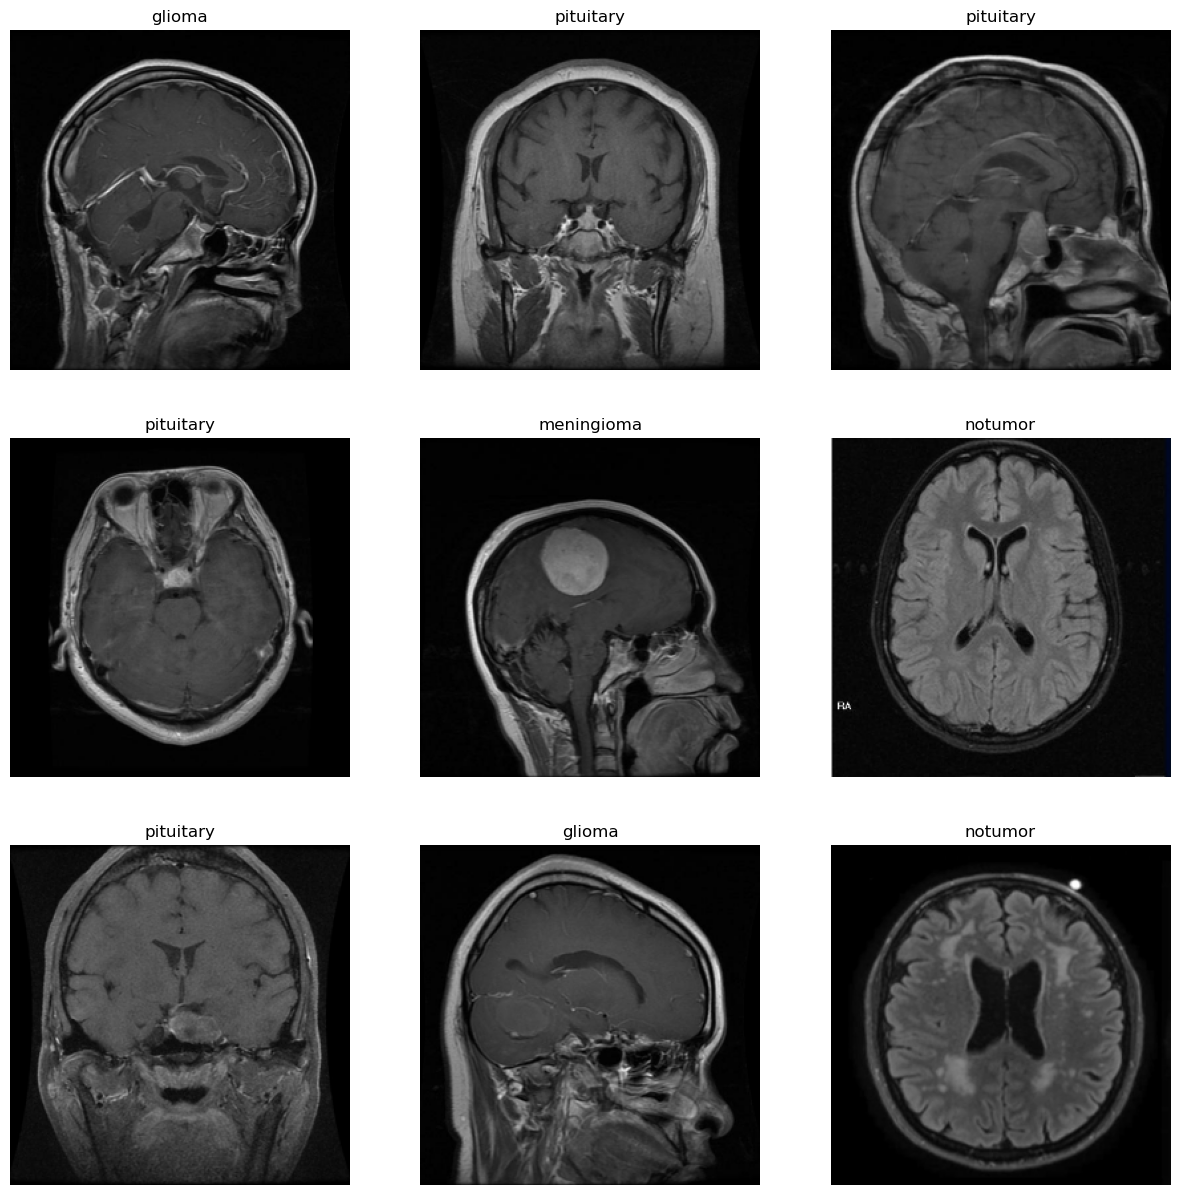

In [11]:
class_names = dataset.class_names
plt.figure(figsize=(15, 15))
for images, labels in dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("int"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [6]:
from tensorflow.keras.applications.vgg16 import VGG16
from keras.callbacks import ReduceLROnPlateau
from keras import Model, layers
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.layers import GlobalMaxPooling2D, GlobalAveragePooling2D, Dropout, Dense, Input, Conv2D, MaxPooling2D, Flatten,MaxPooling3D

In [7]:
from tensorflow.keras.applications.vgg16 import VGG16

In [16]:
vgg16_model = VGG16(pooling='avg', weights='imagenet', include_top=False, input_shape=(256,256,3))
for layers in vgg16_model.layers:
            layers.trainable=False
last_output = vgg16_model.layers[-1].output
vgg_x = Flatten()(last_output)
vgg_x = Dense(128, activation = 'relu')(vgg_x)
vgg_x = Dense(4, activation = 'softmax')(vgg_x)
vgg16_final_model = Model(vgg16_model.input, vgg_x)
vgg16_final_model.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics=['acc'])

# VGG16
history = vgg16_final_model.fit(train_dataset, epochs =12 ,validation_data = test_dataset)


Epoch 1/12
143/143 [==============================] - 1466s 10s/step - loss: 0.8480 - acc: 0.7237 - val_loss: 1.0516 - val_acc: 0.6183
Epoch 2/12
143/143 [==============================] - 6272s 44s/step - loss: 0.4832 - acc: 0.8493 - val_loss: 0.9584 - val_acc: 0.6374
Epoch 3/12
143/143 [==============================] - 4923s 35s/step - loss: 0.3892 - acc: 0.8786 - val_loss: 1.0189 - val_acc: 0.6679
Epoch 4/12
143/143 [==============================] - 1382s 10s/step - loss: 0.3572 - acc: 0.8799 - val_loss: 0.9997 - val_acc: 0.7137
Epoch 5/12
143/143 [==============================] - 3319s 23s/step - loss: 0.3203 - acc: 0.8967 - val_loss: 0.9471 - val_acc: 0.6870
Epoch 6/12
143/143 [==============================] - 5889s 41s/step - loss: 0.2973 - acc: 0.9040 - val_loss: 0.8832 - val_acc: 0.6947
Epoch 7/12
143/143 [==============================] - 1302s 9s/step - loss: 0.2870 - acc: 0.9029 - val_loss: 0.8420 - val_acc: 0.7290
Epoch 8/12
143/143 [==============================] - 69

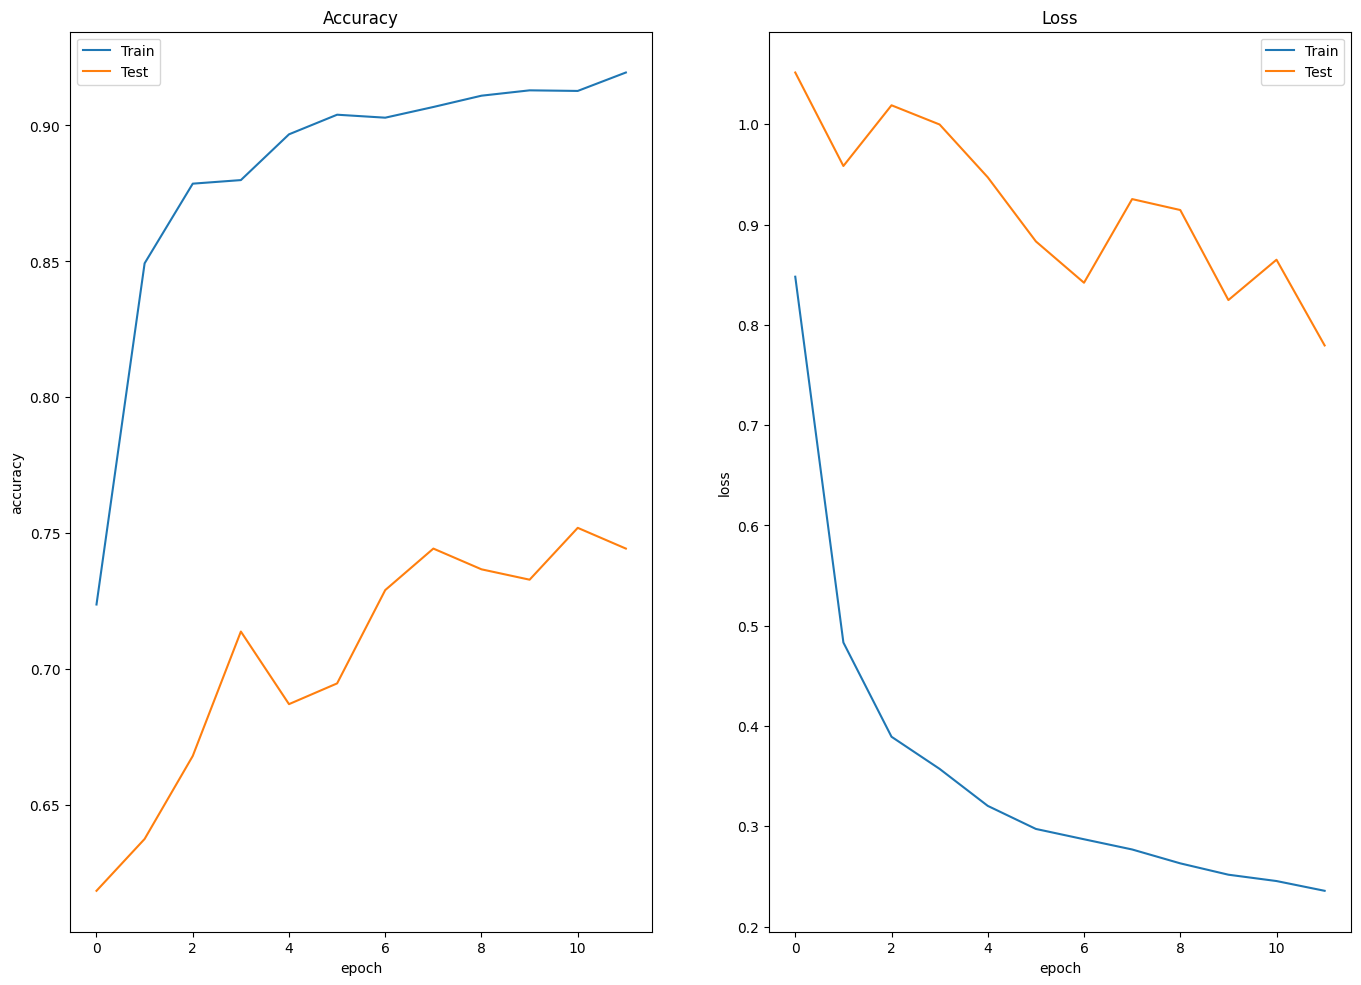

In [17]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16.53, 11.69))
ax1.plot(history.history['acc'])
ax1.plot(history.history['val_acc'])
ax1.set_xlabel('epoch')
ax1.set_ylabel('accuracy')
ax1.set_title('Accuracy')
ax1.legend(['Train', 'Test'], loc='upper left')

ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_xlabel('epoch')
ax2.set_ylabel('loss')
ax2.set_title('Loss')
ax2.legend(['Train', 'Test'], loc="upper right")

In [9]:
y_pred = []  # store predicted labels
y_true = []  # store true labels

# iterate over the dataset
for i, (image_batch, label_batch) in enumerate(test_dataset):  
    # append true labels
    y_true.append(label_batch)
    # compute predictions
    preds = vgg16_final_model.predict(image_batch)
    # append predicted labels
    y_pred.append(np.argmax(preds, axis =  1))
    if i==300:
        break

# convert the true and predicted labels into tensors
correct_labels = tf.concat([item for item in y_true], axis = 0)
correct_labels = np.argmax(correct_labels, axis=1)
predicted_labels = tf.concat([item for item in y_pred], axis = 0)

NameError: name 'test_dataset' is not defined

In [50]:
def plot_confusion_matrix(cm, classes,
                        normalize=True,
                        title='Confusion matrix',
                        figsize=(10, 10),
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=figsize)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.8668993  0.1331007  0.         0.        ]
 [0.1309233  0.3605276  0.16463117 0.34391793]
 [0.06190125 0.08695652 0.81429624 0.03684598]
 [0.03338316 0.04932735 0.         0.91728949]]


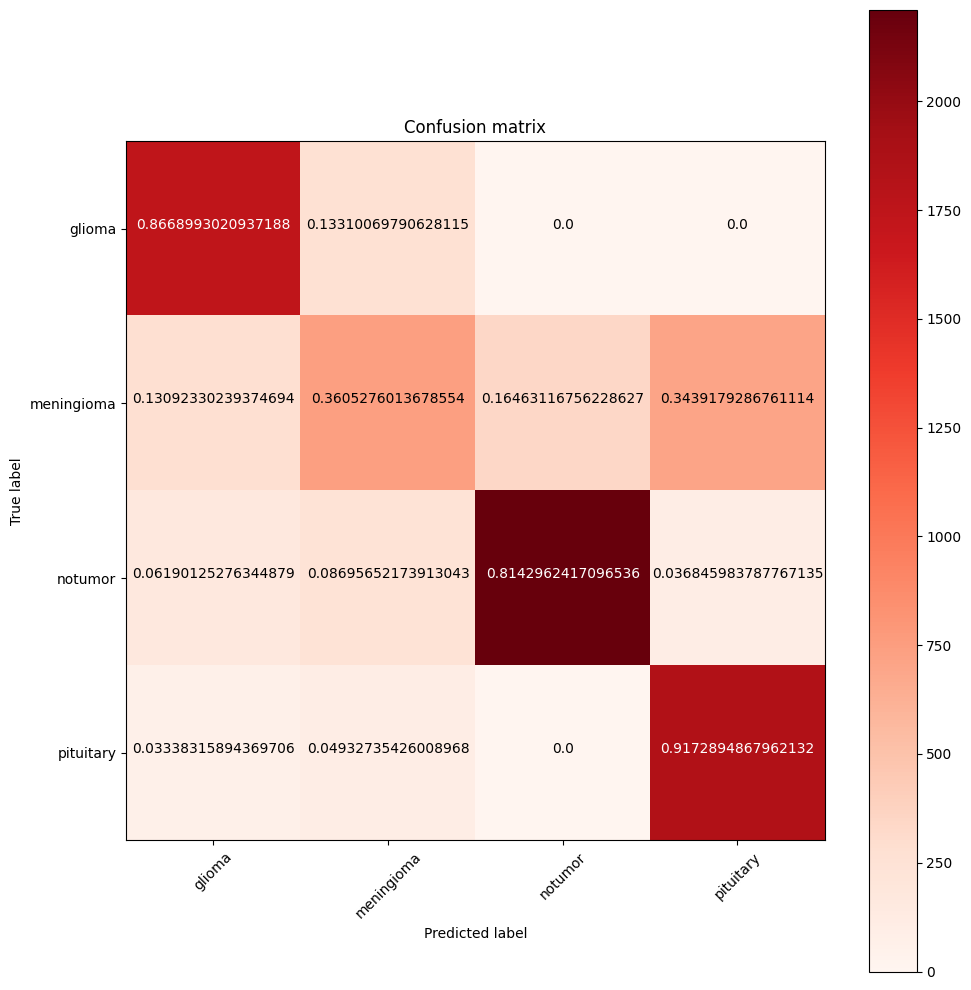

In [51]:
cm = confusion_matrix(correct_labels, predicted_labels)
plot_confusion_matrix(cm, train_dataset.class_indices, cmap='Reds')

In [8]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("98.png", 256)
image = image[:,:,:3]
pred = vgg16_final_model.predict(tf.expand_dims(image, axis=0))
print(=)
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])

NameError: name 'vgg16_final_model' is not defined

In [56]:
import pickle
filename="model.sav"
pickle.dump(vgg16_final_model,open(filename,'wb'))

In [10]:
from keras.models import load_model
loaded_model = pickle.load(open(f, 'rb'))

OSError: Unable to synchronously open file (file signature not found)

In [12]:
import joblib
model = joblib.load("model.sav")


1/1 [==============================] - 1s 605ms/step
[[0.9816321  0.01522032 0.00136951 0.00177803]]


Text(0.5, 1.0, 'glioma')

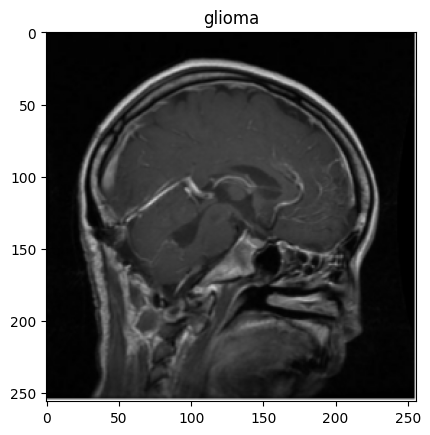

In [16]:
def load_and_resize_image(filename, size):

  # Load image
  img = tf.io.read_file(filename)
  
  # Compile image
  img = tf.image.decode_image(img)

  # Resize image
  img = tf.image.resize(img, [size, size])

  # Scale the tensor
  img = img / 255

  return img

image = load_and_resize_image("98.png", 256)
image = image[:,:,:3]
pred = model.predict(tf.expand_dims(image, axis=0))
print(pred)
plt.imshow(image)
plt.title(class_names[pred[0].argmax()])